<a href="https://colab.research.google.com/github/madhurasharan/Netflix-Dataset-Analysis/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For cleaner visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


# Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# View top 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic Information

In [3]:
# Check dataset info
df.info()

# Check missing values
df.isnull().sum()

# Basic stats
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

# Remove extra spaces
df.columns = df.columns.str.strip()

# Verify cleaning
df.isnull().sum()


/tmp/ipython-input-360960697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-360960697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,0
duration,3


# Exploratory Data Analysis (EDA)

**A. Count of Movies vs TV Shows**

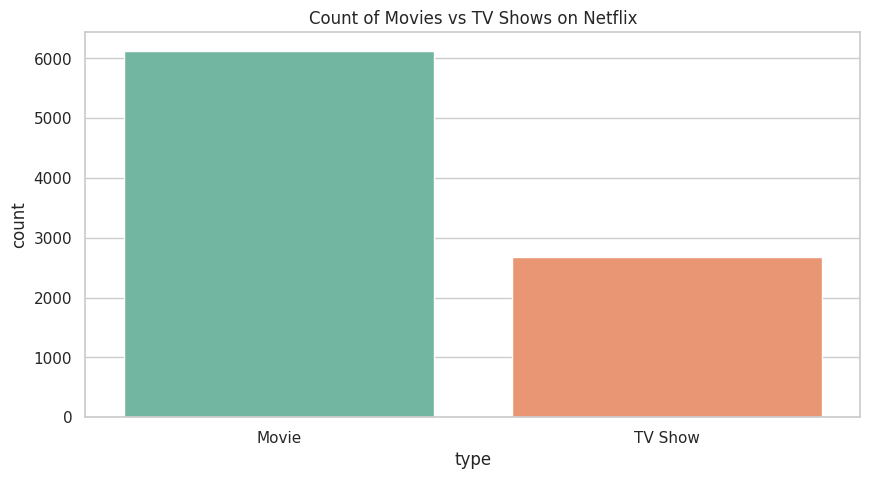

In [11]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Count of Movies vs TV Shows on Netflix')
plt.show()


**B. Content Added Over the Years**

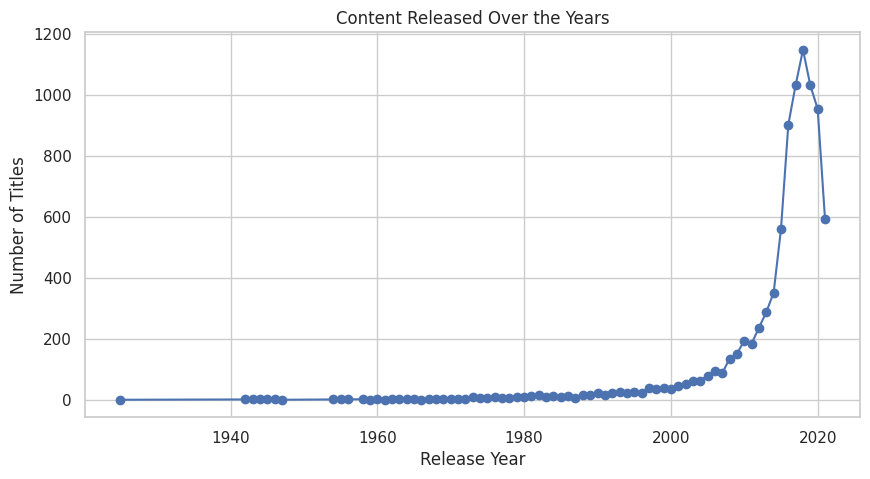

In [6]:
# Count by release year
release_counts = df['release_year'].value_counts().sort_index()

plt.plot(release_counts.index, release_counts.values, marker='o')
plt.title('Content Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


**C. Top 10 Countries with Most Titles**

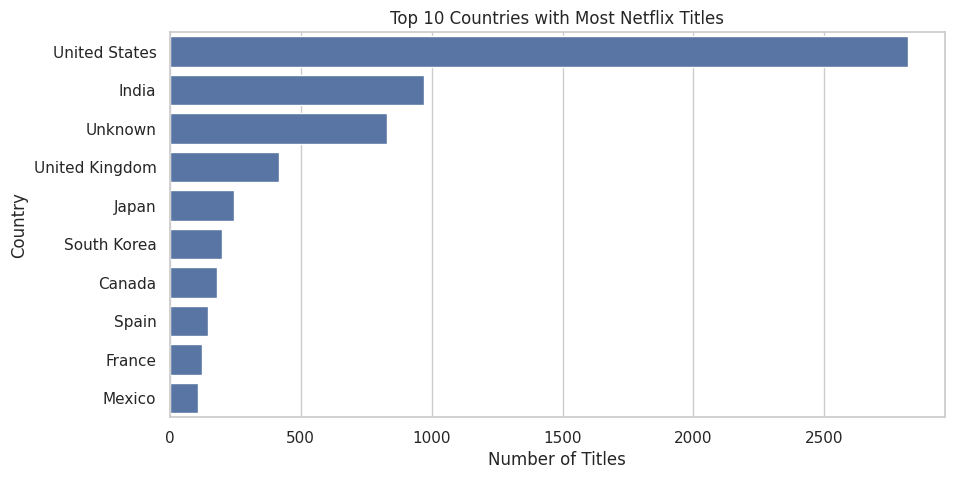

In [15]:
sns.barplot(x= top_countries.values, y= top_countries.index)
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


**D. Top 10 Genres**

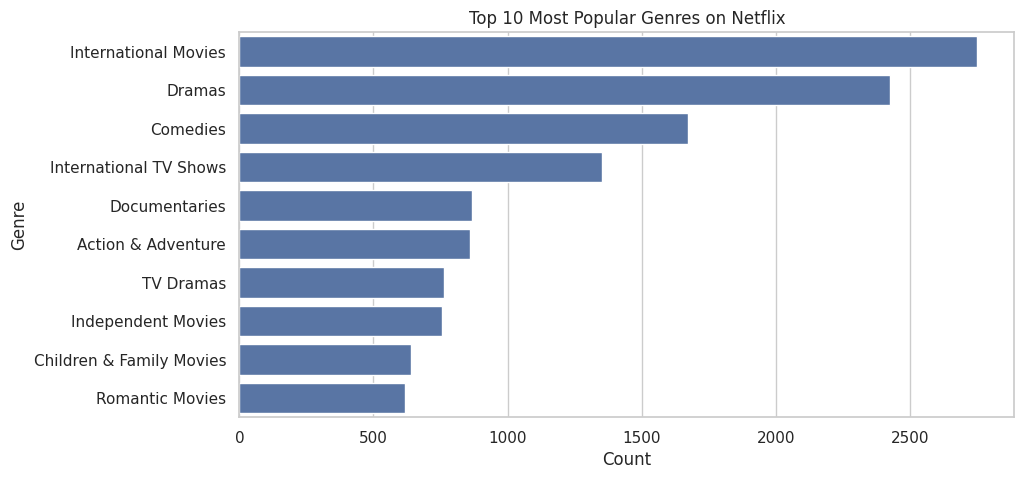

In [18]:
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


**E. Rating Distribution**

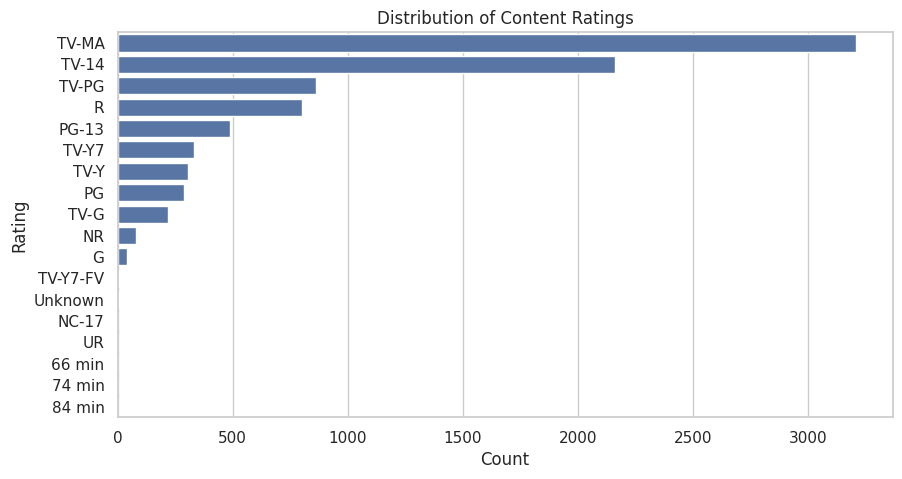

In [19]:
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index
)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


**F. Duration Insights**

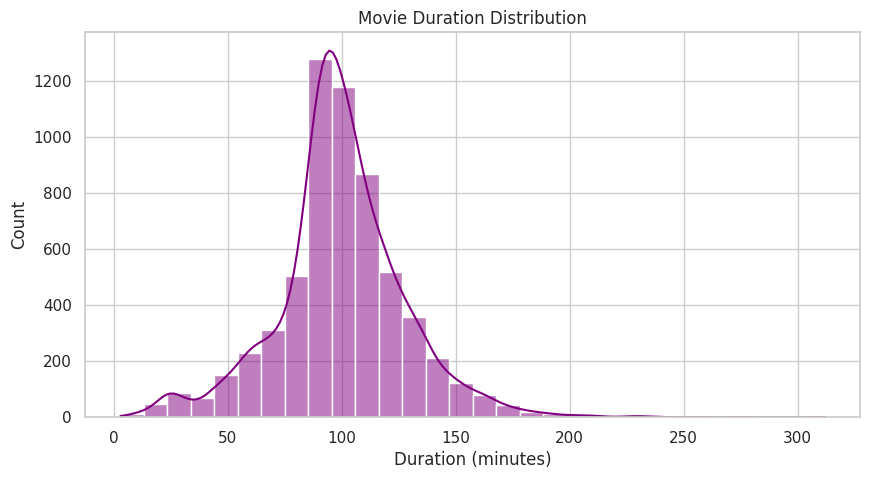

In [10]:
# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (in minutes)
movies['duration_num'] = movies['duration'].str.replace(' min', '').astype(float)

sns.histplot(movies['duration_num'], bins=30, kde=True, color='purple')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()


# Conclusions



* Movies dominate Netflix’s catalog compared to TV shows.

* There has been a sharp rise in content releases after 2015, reflecting Netflix’s global expansion.

* United States and India are the top producers of Netflix content.

* The most common genres are Dramas, Comedies, and Documentaries.

* Most movies have a duration between 90–120 minutes, matching standard film lengths.

* Data indicates Netflix’s focus on diverse, genre-rich, and globally appealing content.

* Trend shows an increasing investment in regional and original productions.

